<h1 style="color:blue;">Load The Data</h1>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('survey.csv')

<h1 style="color:blue;">Read The Data</h1>


In [3]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [5]:
df.shape

(1259, 27)

In [6]:
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [7]:
missing_values = df.isnull().sum()
missing_values[missing_values>0]

state              515
self_employed       18
work_interfere     264
comments          1095
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.sample(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
890,2014-08-28 17:33:20,42,male,United States,VA,Yes,Yes,No,Sometimes,6-25,...,Don't know,Maybe,Maybe,Some of them,No,No,Maybe,Don't know,No,NaN
1143,2014-09-01 10:40:32,27,female,United Kingdom,NaN,No,Yes,No,NaN,More than 1000,...,Don't know,Maybe,No,No,No,No,Yes,Yes,No,NaN
649,2014-08-28 04:02:47,22,Female,Netherlands,NaN,No,No,No,Often,6-25,...,Don't know,No,No,No,Some of them,No,Yes,Don't know,No,NaN
898,2014-08-28 17:47:49,50,Male,United States,VA,Yes,No,No,Never,1-5,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,A lot of these answers aren't really applicabl...
422,2014-08-27 15:32:43,28,Male,New Zealand,NaN,No,Yes,Yes,Sometimes,6-25,...,Very easy,No,No,Yes,Yes,Yes,Yes,Yes,No,NaN


In [10]:
for col in df.columns:
    print(f"{col} has {df[col].nunique()} unique values")

Timestamp has 1246 unique values
Age has 53 unique values
Gender has 49 unique values
Country has 48 unique values
state has 45 unique values
self_employed has 2 unique values
family_history has 2 unique values
treatment has 2 unique values
work_interfere has 4 unique values
no_employees has 6 unique values
remote_work has 2 unique values
tech_company has 2 unique values
benefits has 3 unique values
care_options has 3 unique values
wellness_program has 3 unique values
seek_help has 3 unique values
anonymity has 3 unique values
leave has 5 unique values
mental_health_consequence has 3 unique values
phys_health_consequence has 3 unique values
coworkers has 3 unique values
supervisor has 3 unique values
mental_health_interview has 3 unique values
phys_health_interview has 3 unique values
mental_vs_physical has 3 unique values
obs_consequence has 2 unique values
comments has 160 unique values


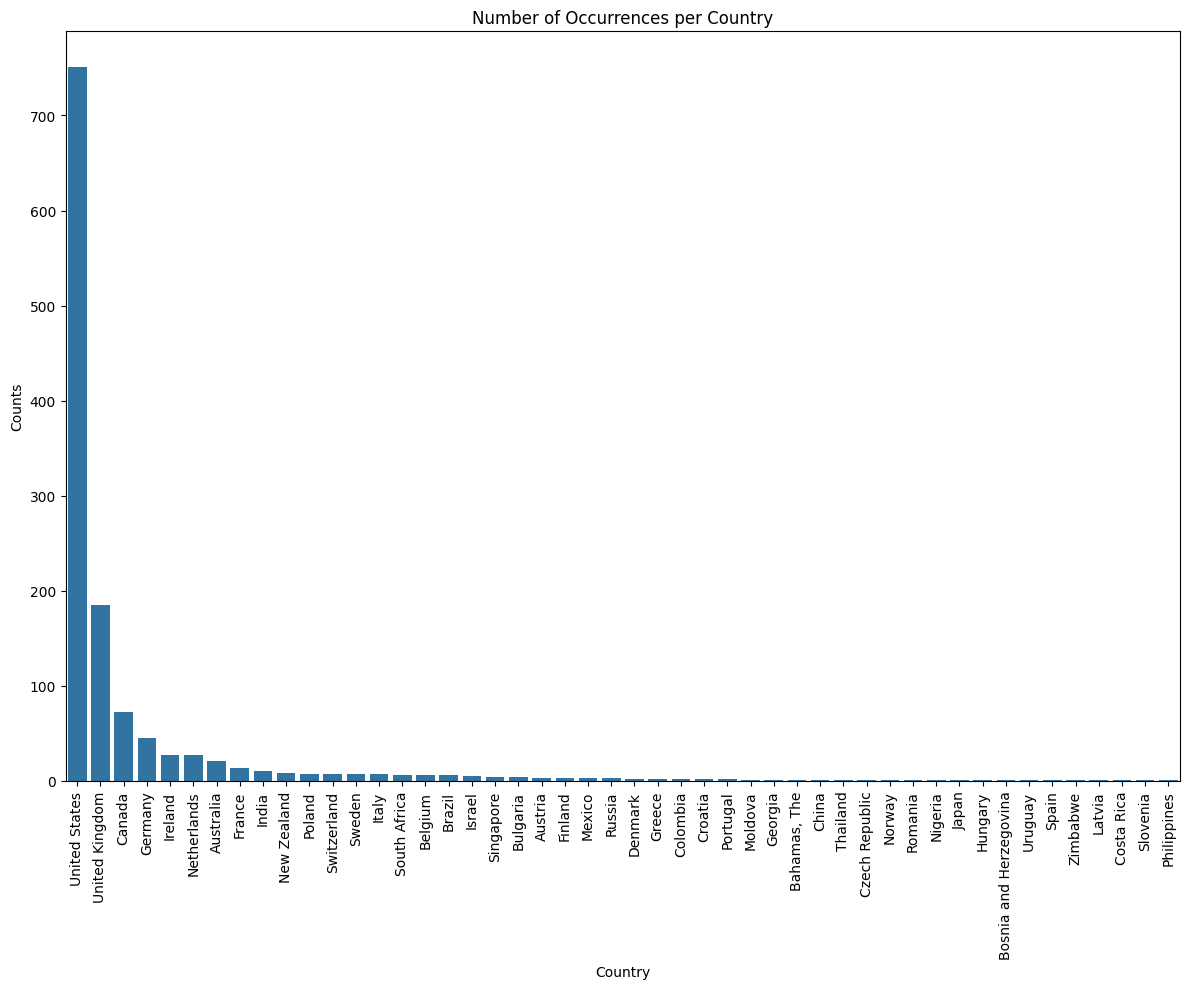

In [11]:
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Counts']
plt.figure(figsize=(12,10))
sns.barplot(x='Country', y='Counts', data=country_counts)
plt.xlabel("Country")
plt.ylabel("Counts")
plt.title("Number of Occurrences per Country")
plt.xticks(rotation=90)  # Rotate the labels 45 degrees and align them to the right
plt.tight_layout() 
plt.show()

In [12]:
us_count = df.Country.value_counts().get('United States',0)

In [13]:
us_count ##751 rows

751

In [14]:
df[df['Country']!='United States'].shape ## 508 rows

(508, 27)

<h1 style="color:blue;">Data Cleaning</h1>


In [15]:

## Drop Comments and TimeStamp column
df = df.drop(['comments'],axis=1)
df =df.drop(['Timestamp'],axis=1)

In [16]:
# For Nan Values of State with Country name
df["state"] = df["state"].fillna(df["Country"])

#For Nan Values of work_interfere replace with unknown
df['work_interfere'] = df['work_interfere'].fillna('unknown')

#drop self_employed row that have Nan values
df = df.dropna(subset=['self_employed'])

# Now no Nan values
df.isnull().sum()

Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [17]:
df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,46,male,United States,MD,Yes,Yes,No,Sometimes,1-5,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
19,36,Male,France,France,Yes,Yes,No,unknown,6-25,Yes,...,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No
20,29,Male,United States,NY,No,Yes,Yes,Sometimes,100-500,No,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,31,male,United States,NC,Yes,No,No,Never,1-5,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,46,Male,United States,MA,No,No,Yes,Often,26-100,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No


In [18]:
df.shape  ## 1241 rows

(1241, 25)

In [19]:
df['Age'].unique()

array([         46,          36,          29,          31,          41,
                33,          35,          34,          37,          32,
                30,          42,          40,          27,          38,
                50,          24,          18,          28,          26,
                22,          44,          23,          19,          25,
                39,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

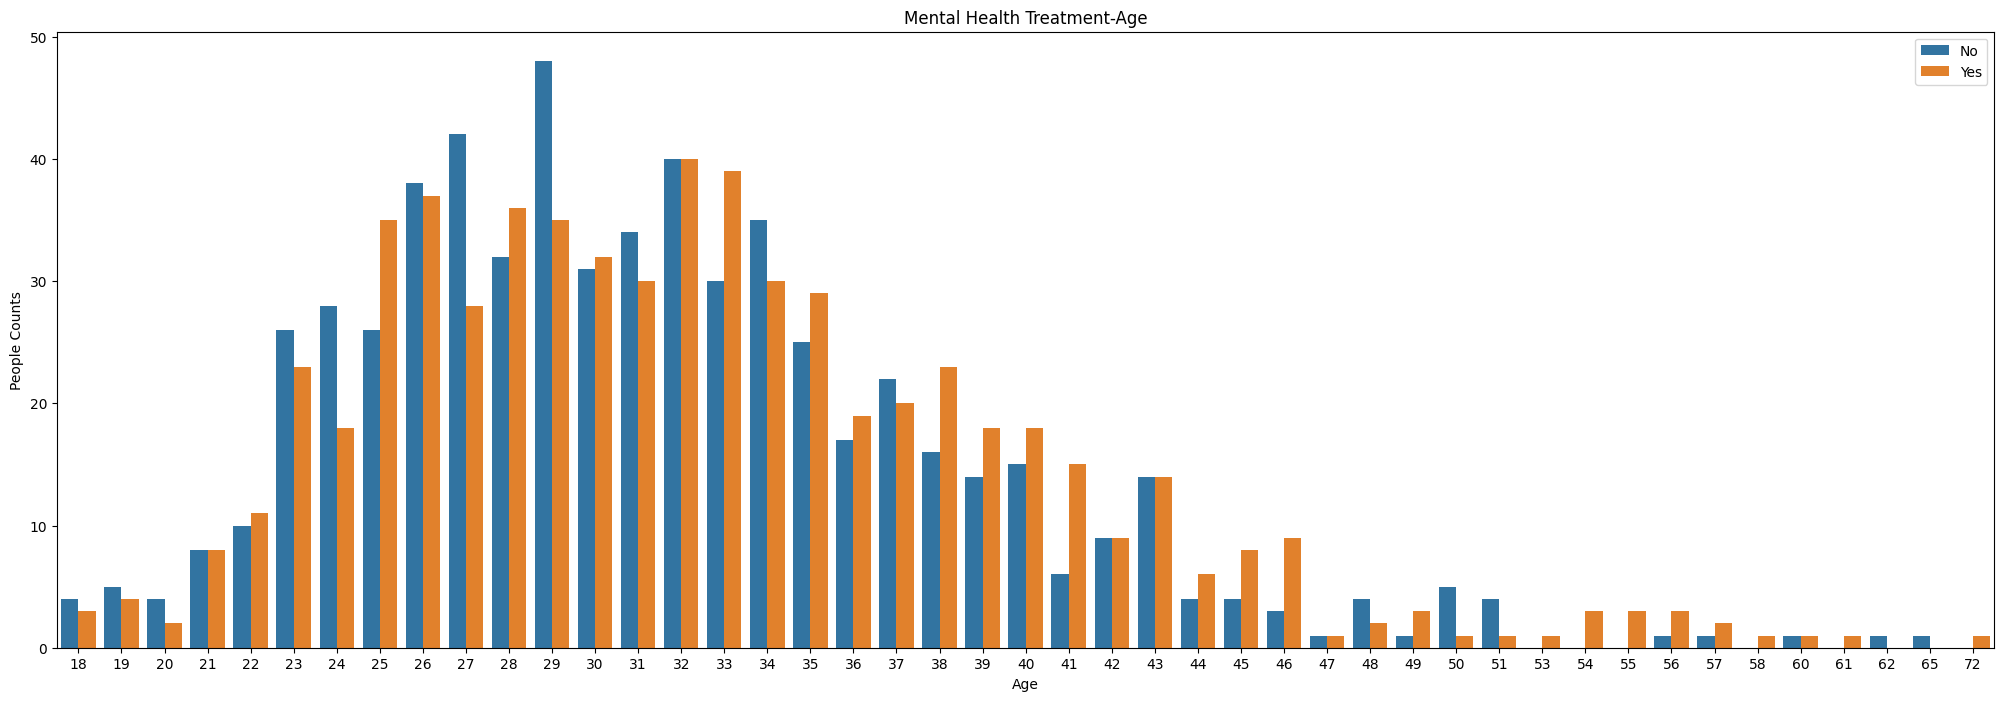

In [20]:
df = df[(df['Age']>17) & (df['Age']<=100) ]
plt.figure(figsize=(25,8))
sns.countplot(x='Age',hue='treatment',data=df)
plt.title('Mental Health Treatment-Age')
plt.xlabel('Age')
plt.ylabel('People Counts')
plt.legend(labels=['No','Yes'])
plt.show()

In [21]:
df['Gender'].unique()

array(['male', 'Male', 'Female', 'female', 'M', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'Malr', 'femail',
       'Cis Man', 'ostensibly male, unsure what that really means'],
      dtype=object)

In [22]:
distinct_gender = df['Gender'].unique()

# Create a mapping table
gender_mapping = {
    'Male': ['Male', 'male', 'M', 'm', 'Cis Male', 'cis male', 'Male (CIS)', 'cis-male/femme', 'Mail', 'Mailr', 'Malr', 'msle', 'guy (-ish) ^_^'],
    'Female': ['Female', 'female', 'F', 'f', 'Cis Female', 'cis-female/femme', 'Cis Woman', 'Female (cis)', 'Trans Female', 'Trans woman', 'Trans-female'],
    'Non-binary': ['Non-binary', 'non-binary', 'Genderqueer', 'genderqueer', 'Androgyne', 'Agender', 'fluid', 'Neuter', 'androgyne'],
    'Other': ['Other', 'Nah', 'All', 'Enby', 'something kinda male?', 'male leaning androgynous', 'queer', 'queer/she/they', 'queer/q/they', 'ostensibly male, unsure what that really means', 'Guy (-ish) ^_^', 'A little about you']
}

def map_gender(value): 
    for key,values in gender_mapping.items():
        if value in values:
            return key
    return 'Other'

df['Gender'] = df['Gender'].apply(map_gender)



In [23]:
df

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,46,Male,United States,MD,Yes,Yes,No,Sometimes,1-5,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
19,36,Male,France,France,Yes,Yes,No,unknown,6-25,Yes,...,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No
20,29,Male,United States,NY,No,Yes,Yes,Sometimes,100-500,No,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,31,Male,United States,NC,Yes,No,No,Never,1-5,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,46,Male,United States,MA,No,No,Yes,Often,26-100,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,United Kingdom,United Kingdom,No,No,Yes,unknown,26-100,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,Male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,Female,United States,NC,No,No,No,unknown,100-500,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [24]:
df['Gender'].unique()

array(['Male', 'Female', 'Other', 'Non-binary'], dtype=object)

In [25]:
# For numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", numerical_cols)

# For categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_cols)


Numerical Columns: Index(['Age'], dtype='object')
Categorical Columns: Index(['Gender', 'Country', 'state', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')


In [26]:
df.Country.unique()

array(['United States', 'France', 'United Kingdom', 'Canada', 'Portugal',
       'Netherlands', 'Switzerland', 'Poland', 'Australia', 'Germany',
       'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica', 'Austria',
       'Ireland', 'India', 'South Africa', 'Italy', 'Bulgaria', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand', 'Spain',
       'Finland', 'Uruguay', 'Israel', 'Bosnia and Herzegovina',
       'Hungary', 'Singapore', 'Japan', 'Nigeria', 'Croatia', 'Norway',
       'Thailand', 'Denmark', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

In [27]:
df.shape

(1233, 25)

In [28]:
len(numerical_cols),len(categorical_cols)

(1, 24)

In [29]:
# Total observations 1241, num_col:1 , cat_col:24

In [30]:
#Age Statistical summary
custom_percentiles = [0.01, 0.25, 0.5, 0.75, 0.99]

df[numerical_cols].describe(percentiles=custom_percentiles).T


,count,mean,std,min,1%,25%,50%,75%,99%,max
Age,1233.0,32.061638,7.305337,18.0,19.0,27.0,31.0,36.0,56.0,72.0


In [31]:
df[categorical_cols].describe().T

,count,unique,top,freq
Gender,1233,4,Male,960
Country,1233,46,United States,735
state,1233,90,United Kingdom,182
self_employed,1233,2,No,1091
family_history,1233,2,No,751
treatment,1233,2,Yes,623
work_interfere,1233,5,Sometimes,457
no_employees,1233,6,6-25,283
remote_work,1233,2,No,868
tech_company,1233,2,Yes,1009


<h1 style="color:blue;">EDA (Exploratory Data Analysis)</h1>


## 1.Gender Distributions (Pie Chart)

In [32]:
# select Gender for which treatment is done
treatment_counts = df[df['treatment']=='Yes']['Gender'].value_counts()

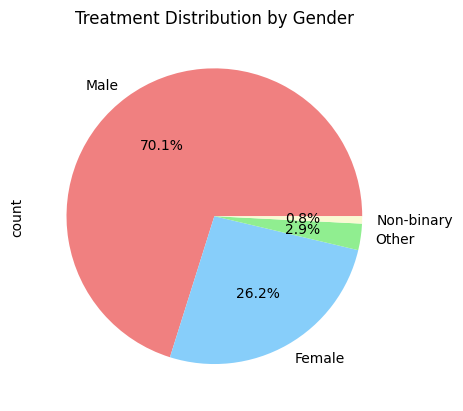

In [33]:
treatment_counts.plot.pie(autopct='%1.1f%%',
                          colors = ['lightcoral', 'lightskyblue', 
                                    'lightgreen', 'lightgoldenrodyellow']
                         )

plt.title("Treatment Distribution by Gender")

plt.show()

# 2. Gender and Treatment   (Bar Chart)

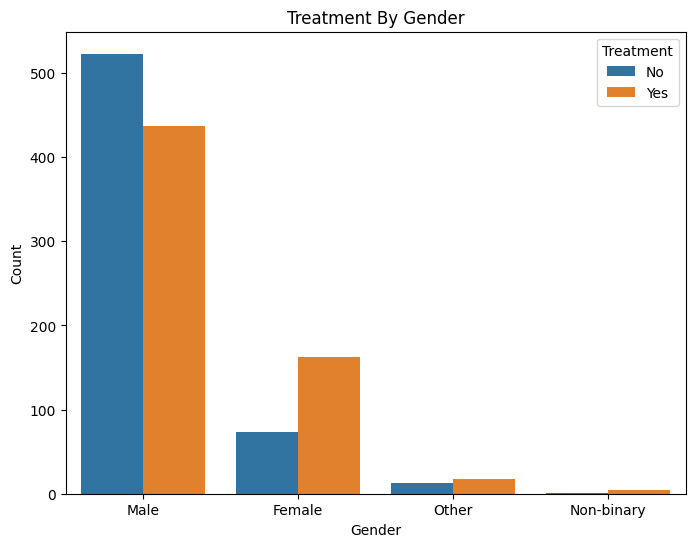

In [34]:
plt.figure(figsize=(8,6))
sns.countplot(x='Gender',hue='treatment',data=df)
plt.title('Treatment By Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Treatment')
plt.show()

# 3 Family history and illeness and treatment

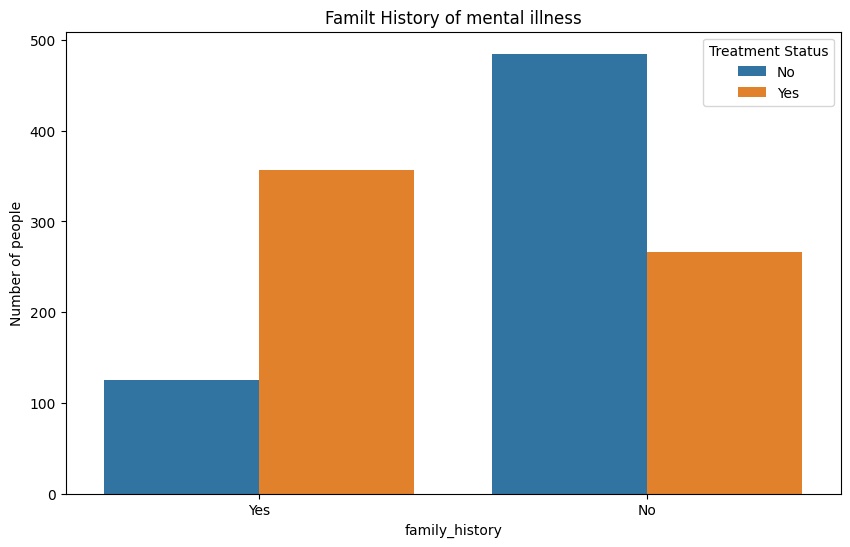

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x='family_history',hue='treatment',data=df)
plt.title('Familt History of mental illness')
plt.xlabel('family_history')
plt.ylabel('Number of people')
plt.legend(title='Treatment Status')
plt.show()

# 4. company_benifit and mental health 

In [122]:
pivot_df = df.groupby(['benefits', 'treatment']).size().unstack(fill_value=0)


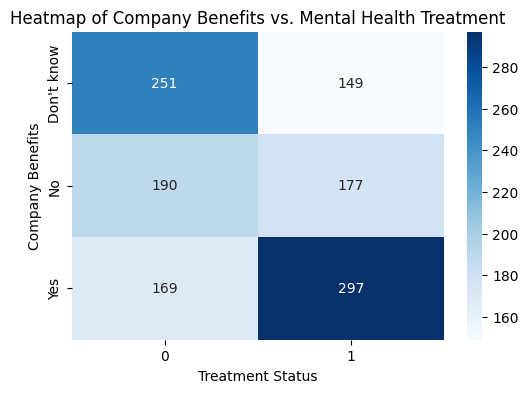

In [123]:
plt.figure(figsize=(6,4))
sns.heatmap(pivot_df, annot=True, cmap="Blues", fmt="d")

# Labels
plt.xlabel("Treatment Status")
plt.ylabel("Company Benefits")
plt.title("Heatmap of Company Benefits vs. Mental Health Treatment")

plt.show()


## Logistic Regression

In [37]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  

In [38]:
main_features = [
    'Gender', 'self_employed', 'family_history', 'mental_health_consequence', 'work_interfere',
    'tech_company', 'benefits', 'wellness_program', 'seek_help', 'anonymity',
    'leave', 'phys_health_consequence', 'coworkers', 'supervisor',
    'mental_health_interview', 'phys_health_interview', 'mental_vs_physical',
    'obs_consequence', 'no_employees'
]

In [39]:
# define X and Y
X = df[main_features]
y = df['treatment']
# For Dummy Encoding we remove first variable
X=pd.get_dummies(X,drop_first=True)


In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [41]:
# train the logistic regression model
model = LogisticRegression(max_iter=100)
model.fit(X_train,y_train)


LogisticRegression()

In [42]:
y_pred = model.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy}")
print('Classification Report:')
print(classification_report(y_test,y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))

Accuracy:0.8216216216216217
Classification Report:
              precision    recall  f1-score   support

          No       0.85      0.76      0.80       175
         Yes       0.80      0.88      0.84       195

    accuracy                           0.82       370
   macro avg       0.82      0.82      0.82       370
weighted avg       0.82      0.82      0.82       370

Confusion Matrix:
[[133  42]
 [ 24 171]]


In [44]:
from sklearn.ensemble import RandomForestClassifier

# Train model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)


work_interfere_unknown           0.131319
work_interfere_Sometimes         0.112591
family_history_Yes               0.072904
work_interfere_Often             0.055481
work_interfere_Rarely            0.043233
benefits_Yes                     0.029651
Gender_Male                      0.028119
coworkers_Some of them           0.025891
phys_health_interview_No         0.024224
anonymity_Yes                    0.021525
leave_Somewhat easy              0.021406
benefits_No                      0.021010
supervisor_Some of them          0.020699
supervisor_Yes                   0.019689
seek_help_No                     0.018885
tech_company_Yes                 0.018393
mental_vs_physical_No            0.018348
no_employees_6-25                0.018114
phys_health_consequence_No       0.018006
mental_vs_physical_Yes           0.017919
mental_health_consequence_No     0.017793
mental_health_consequence_Yes    0.017478
no_employees_26-100              0.017262
obs_consequence_Yes              0

## RandomForest

In [45]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

In [46]:
data = pd.read_csv('survey.csv')


In [47]:
missing_values = data.isnull().sum()
missing_values[missing_values>0]

state              515
self_employed       18
work_interfere     264
comments          1095
dtype: int64

In [48]:
data.drop('comments',axis=1,inplace=True)
data.drop('Timestamp',axis=1,inplace=True)


In [49]:
data["state"] = data["state"].fillna(df["Country"])


In [50]:
data['work_interfere'] = data['work_interfere'].fillna('unknown')
data = data.dropna(subset=['self_employed'])


In [51]:
data.isnull().sum()

Age                          0
Gender                       0
Country                      0
state                        2
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [52]:
encoder = LabelEncoder()

categorical_cols = data.select_dtypes(include=['object']).columns

# Apply Label Encoding to all categorical columns
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

In [53]:
from sklearn.ensemble import RandomForestClassifier

X = data.drop(['treatment'], axis=1) 
y = data['treatment']
# Train model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)


work_interfere               0.262466
family_history               0.083695
Age                          0.079604
state                        0.062507
care_options                 0.052369
Gender                       0.046194
no_employees                 0.040354
Country                      0.037399
leave                        0.034168
benefits                     0.032825
supervisor                   0.025256
coworkers                    0.024940
phys_health_interview        0.024822
mental_vs_physical           0.024465
mental_health_consequence    0.023295
seek_help                    0.023139
anonymity                    0.022121
wellness_program             0.019653
phys_health_consequence      0.016121
remote_work                  0.015659
mental_health_interview      0.014222
obs_consequence              0.014149
tech_company                 0.011409
self_employed                0.009169
dtype: float64


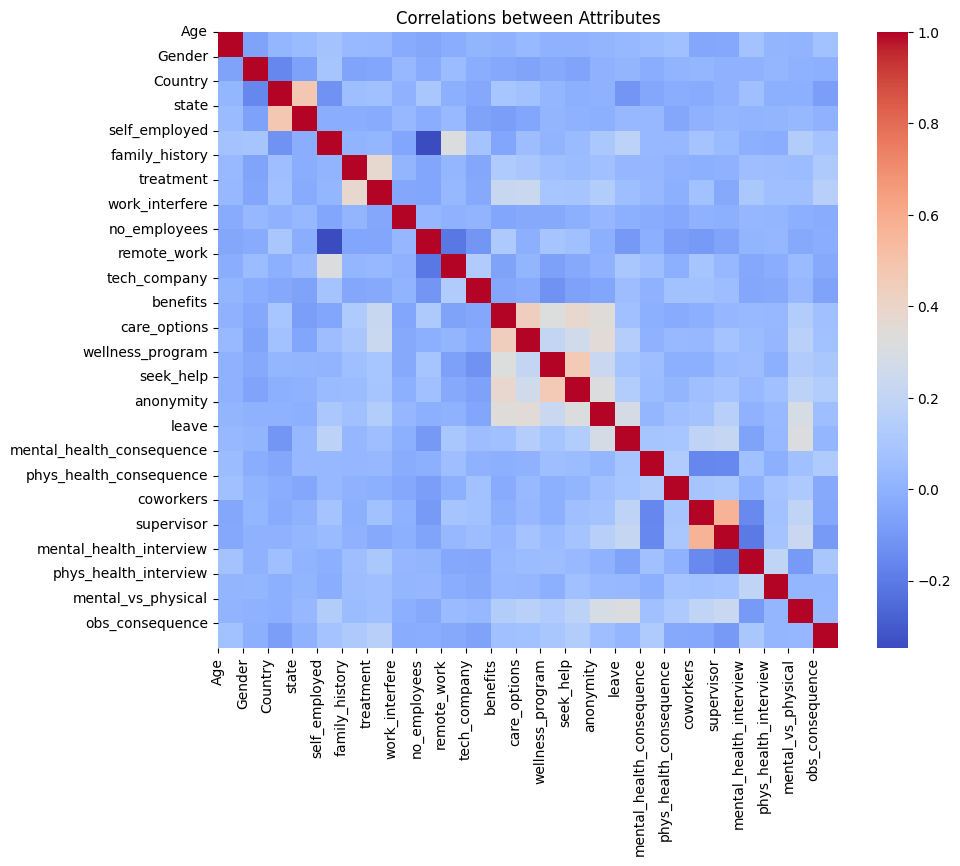

In [54]:
corr=data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap='coolwarm')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
#plt.colorbar()
plt.title("Correlations between Attributes")
plt.show()

In [55]:
X=data.drop('treatment',axis=1)
y = data['treatment']

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [57]:
scale=MinMaxScaler()
X_train['Age']=scale.fit_transform(X_train[['Age']])
X_test['Age']=scale.fit_transform(X_test[['Age']])

In [58]:
model=RandomForestClassifier(n_estimators=20)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [59]:
model.score(X_train,y_train)


1.0

In [60]:
model.score(X_test,y_test)


0.8232931726907631

In [61]:
from sklearn.metrics import accuracy_score,precision_score,mean_squared_error,f1_score


In [62]:
y_pred=model.predict(X_test)


In [63]:
print('Accuracy_score:',accuracy_score(y_pred,y_test))
print('precision_score:',precision_score(y_pred,y_test))
print('f1_score:',f1_score(y_pred,y_test))
print('mean_squared_error:',mean_squared_error(y_pred,y_test))

Accuracy_score: 0.8232931726907631
precision_score: 0.8524590163934426
f1_score: 0.8253968253968254
mean_squared_error: 0.17670682730923695


## Logistic Regression with all feature 

In [64]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  

In [65]:
X=df.drop('treatment',axis=1)
y = df['treatment']

In [66]:
X=pd.get_dummies(X,drop_first=True)


In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [68]:
scale = MinMaxScaler()
X_train['Age'] = scale.fit_transform(X_train[['Age']])
X_test['Age'] = scale.transform(X_test[['Age']])

In [69]:
# train the logistic regression model
model = LogisticRegression(max_iter=100)
model.fit(X_train,y_train)


LogisticRegression()

In [70]:
y_pred = model.predict(X_test)

In [71]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy}")
print('Classification Report:')
print(classification_report(y_test,y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))

Accuracy:0.8405405405405405
Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.78      0.82       175
         Yes       0.82      0.90      0.86       195

    accuracy                           0.84       370
   macro avg       0.84      0.84      0.84       370
weighted avg       0.84      0.84      0.84       370

Confusion Matrix:
[[136  39]
 [ 20 175]]


In [72]:
from sklearn.ensemble import RandomForestClassifier


# Train model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(10))


work_interfere_unknown      0.121287
work_interfere_Sometimes    0.079438
family_history_Yes          0.062295
Age                         0.057693
work_interfere_Often        0.038288
care_options_Yes            0.031185
work_interfere_Rarely       0.024942
benefits_Yes                0.019973
Gender_Male                 0.019303
phys_health_interview_No    0.015748
dtype: float64


## bernoulliNB

In [73]:
df['treatment'] = df['treatment'].replace({'Yes': 1, 'No': 0})

# Check the result
print(df['treatment'].head())

18    0
19    0
20    1
21    0
22    1
Name: treatment, dtype: int64


In [74]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  

In [75]:
X=df.drop('treatment',axis=1)
y = df['treatment']

In [76]:
X=pd.get_dummies(X,drop_first=True)


In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [78]:
scale = MinMaxScaler()
X_train['Age'] = scale.fit_transform(X_train[['Age']])
X_test['Age'] = scale.transform(X_test[['Age']])

In [79]:
y_test

375    1
566    1
825    0
67     0
997    0
      ..
543    1
747    0
363    1
630    1
645    0
Name: treatment, Length: 247, dtype: int64

In [80]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB


In [81]:
gnb = GaussianNB()
mnb= MultinomialNB()
bnb = BernoulliNB()

In [82]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.5546558704453441
[[  7 107]
 [  3 130]]
0.5485232067510548


In [83]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8016194331983806
[[ 76  38]
 [ 11 122]]
0.7625


In [84]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8137651821862348
[[ 83  31]
 [ 15 118]]
0.7919463087248322


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [87]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [88]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': bnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [89]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [90]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.4817813765182186, 0.5333333333333333)

In [91]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.4817813765182186
Precision -  0.5333333333333333
For  KN
Accuracy -  0.7327935222672065
Precision -  0.7964601769911505
For  NB
Accuracy -  0.8137651821862348
Precision -  0.7919463087248322
For  DT
Accuracy -  0.805668016194332
Precision -  0.7544910179640718
For  LR
Accuracy -  0.8421052631578947
Precision -  0.821917808219178
For  RF
Accuracy -  0.8137651821862348
Precision -  0.8
For  AdaBoost
Accuracy -  0.8137651821862348
Precision -  0.8041958041958042
For  BgC
Accuracy -  0.8016194331983806
Precision -  0.7763157894736842
For  ETC
Accuracy -  0.8137651821862348
Precision -  0.8085106382978723
For  GBDT
Accuracy -  0.8218623481781376
Precision -  0.7986577181208053
For  xgb
Accuracy -  0.8016194331983806
Precision -  0.8


In [92]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [93]:
performance_df


,Algorithm,Accuracy,Precision
4,LR,0.842105,0.821918
8,ETC,0.813765,0.808511
6,AdaBoost,0.813765,0.804196
5,RF,0.813765,0.800000
10,xgb,0.801619,0.800000
9,GBDT,0.821862,0.798658
1,KN,0.732794,0.796460
2,NB,0.813765,0.791946
7,BgC,0.801619,0.776316
3,DT,0.805668,0.754491


In [94]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


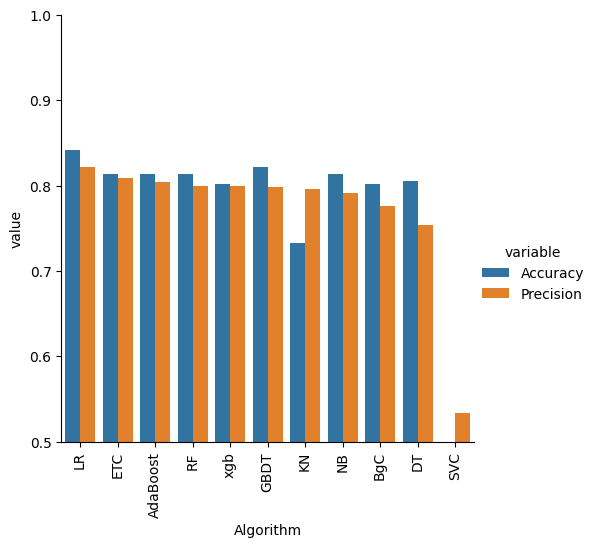

In [95]:
sns.catplot(x = 'Algorithm', y='value',hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## XGBoost

In [96]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Encode categorical variables
X = df.drop('treatment', axis=1)
X = pd.get_dummies(X, drop_first=True)  # One-Hot Encoding
y = df['treatment'].replace({'Yes': 1, 'No': 0})  # Convert target to 0/1

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train XGBoost
xgb = XGBClassifier(n_estimators=50, random_state=2)
xgb.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb.predict(X_test)


In [97]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7919


In [98]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      0.77      0.78       175
           1       0.80      0.81      0.80       195

    accuracy                           0.79       370
   macro avg       0.79      0.79      0.79       370
weighted avg       0.79      0.79      0.79       370



## Voting

In [99]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score

In [100]:
# Define classifiers
lr = LogisticRegression(solver='liblinear', penalty='l1', random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)


In [101]:
voting = VotingClassifier(estimators=[
    ('lr', lr), 
    ('etc', etc), 
    ('abc', abc)
], voting='soft')


In [102]:

# Encode categorical variables
X = df.drop('treatment', axis=1)
X = pd.get_dummies(X, drop_first=True)  # One-Hot Encoding
y = df['treatment'].replace({'Yes': 1, 'No': 0})  # Convert target to 0/1

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [103]:
voting.fit(X_train, y_train)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(penalty='l1', random_state=2,
                                                 solver='liblinear')),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('abc', AdaBoostClassifier(random_state=2))],
                 voting='soft')

In [104]:
y_pred = voting.predict(X_test)


In [105]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

Accuracy: 0.8189189189189189
Precision: 0.7935779816513762


## voting part 2

In [106]:
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

In [107]:
lr = LogisticRegression(solver='liblinear', penalty='l1', random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [108]:
voting = VotingClassifier(estimators=[
    ('lr', lr), 
    ('gbdt', gbdt), 
    ('etc', etc)
], voting='soft')


In [109]:

# Encode categorical variables
X = df.drop('treatment', axis=1)
X = pd.get_dummies(X, drop_first=True)  # One-Hot Encoding
y = df['treatment'].replace({'Yes': 1, 'No': 0})  # Convert target to 0/1

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [110]:
voting.fit(X_train, y_train)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(penalty='l1', random_state=2,
                                                 solver='liblinear')),
                             ('gbdt',
                              GradientBoostingClassifier(n_estimators=50,
                                                         random_state=2)),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [111]:
y_pred = voting.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))


Accuracy: 0.8243243243243243
Precision: 0.7981651376146789


## Stacking

In [112]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [113]:
lr = LogisticRegression(solver='liblinear', penalty='l1', random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)


In [114]:
rf = RandomForestClassifier(n_estimators=50, random_state=2)


In [115]:
stacking = StackingClassifier(estimators=[
    ('lr', lr), 
    ('gbdt', gbdt), 
    ('etc', etc)
], final_estimator=rf)


In [116]:
stacking.fit(X_train, y_train)

# Predictions
y_pred = stacking.predict(X_test)


In [117]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8216216216216217
Precision: 0.8028169014084507
Confusion Matrix:
 [[133  42]
 [ 24 171]]


In [137]:
# pip install shap

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load dataset
df = pd.read_csv('survey.csv')

# Drop unwanted columns
df = df.drop(['comments', 'Timestamp'], axis=1)

# Fill missing values
df["state"] = df["state"].fillna(df["Country"])
df['work_interfere'] = df['work_interfere'].fillna('unknown')
df = df.dropna(subset=['self_employed'])

# Filter Age
df = df[(df['Age'] > 17) & (df['Age'] <= 100)]

# Gender Mapping
gender_mapping = {
    'Male': ['Male', 'male', 'M', 'm', 'Cis Male', 'cis male', 'Male (CIS)', 'cis-male/femme', 'Mail', 'Mailr', 'Malr', 'msle', 'guy (-ish) ^_^'],
    'Female': ['Female', 'female', 'F', 'f', 'Cis Female', 'cis-female/femme', 'Cis Woman', 'Female (cis)', 'Trans Female', 'Trans woman', 'Trans-female'],
    'Non-binary': ['Non-binary', 'non-binary', 'Genderqueer', 'genderqueer', 'Androgyne', 'Agender', 'fluid', 'Neuter', 'androgyne'],
    'Other': ['Other', 'Nah', 'All', 'Enby', 'something kinda male?', 'male leaning androgynous', 'queer', 'queer/she/they', 'queer/q/they', 'ostensibly male, unsure what that really means', 'Guy (-ish) ^_^', 'A little about you']
}

def map_gender(value): 
    for key, values in gender_mapping.items():
        if value in values:
            return key
    return 'Other'

df['Gender'] = df['Gender'].apply(map_gender)

# Encode target variable
df['treatment'] = df['treatment'].replace({'Yes': 1, 'No': 0})

# Feature selection
X = df.drop('treatment', axis=1)
y = df['treatment']

# One-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = MinMaxScaler()
X_train['Age'] = scaler.fit_transform(X_train[['Age']])
X_test['Age'] = scaler.transform(X_test[['Age']])

# Model training
lrc = LogisticRegression(solver='liblinear', penalty='l1')
lrc.fit(X_train, y_train)

# Predictions
y_pred = lrc.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)



Accuracy: 0.8421
Precision: 0.8219
Recall: 0.9023
F1-score: 0.8602
Confusion Matrix:
[[ 88  26]
 [ 13 120]]


In [131]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

In [133]:
y_pred_proba = lrc.predict_proba(X_test)[:, 1]  # Probabilities for the positive class


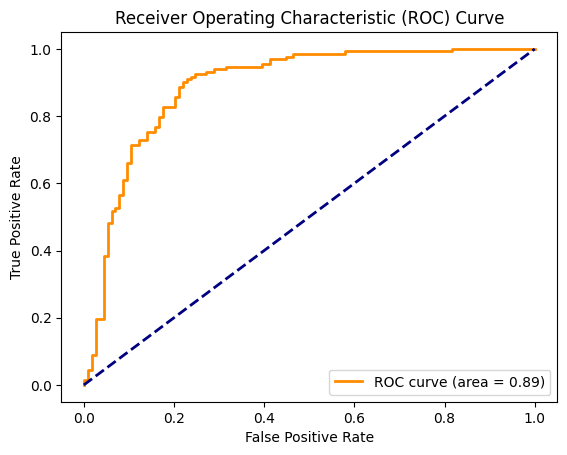

In [134]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


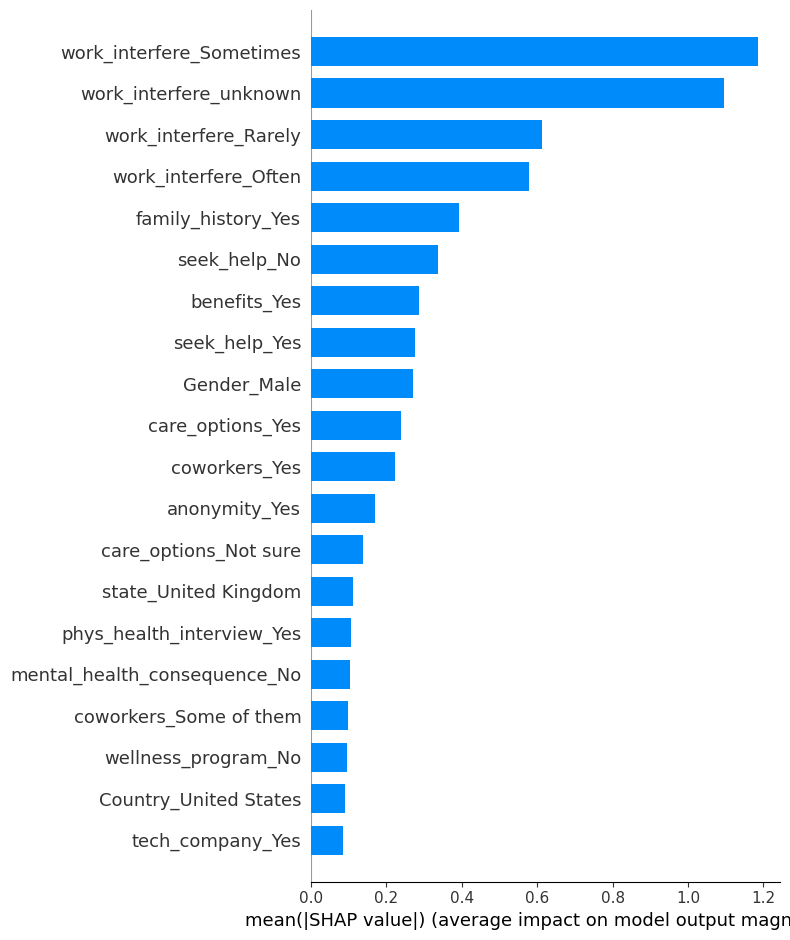

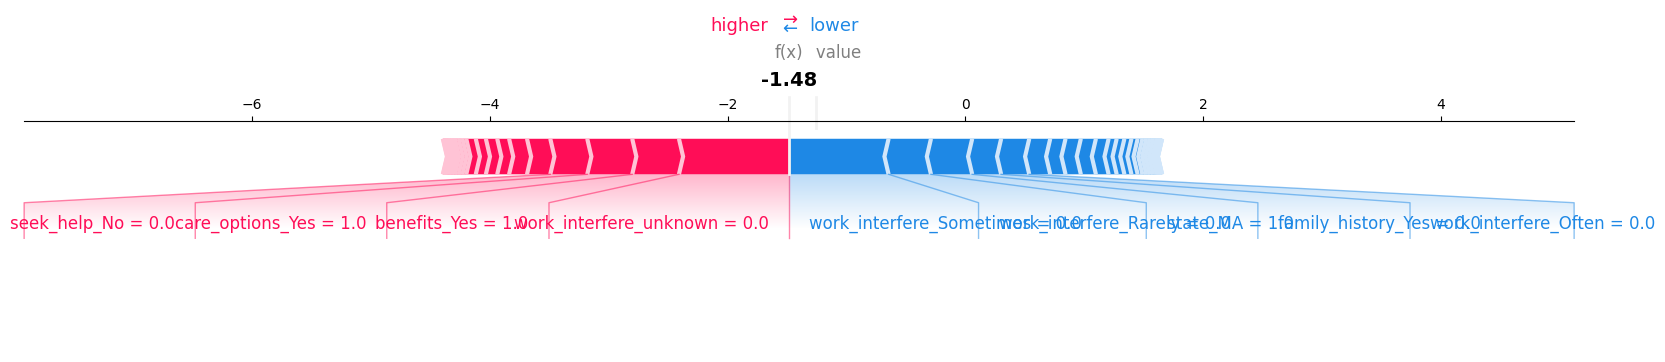

In [135]:
# SHAP Interpretation
explainer = shap.LinearExplainer(lrc, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Force plot for a single prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], matplotlib=True)

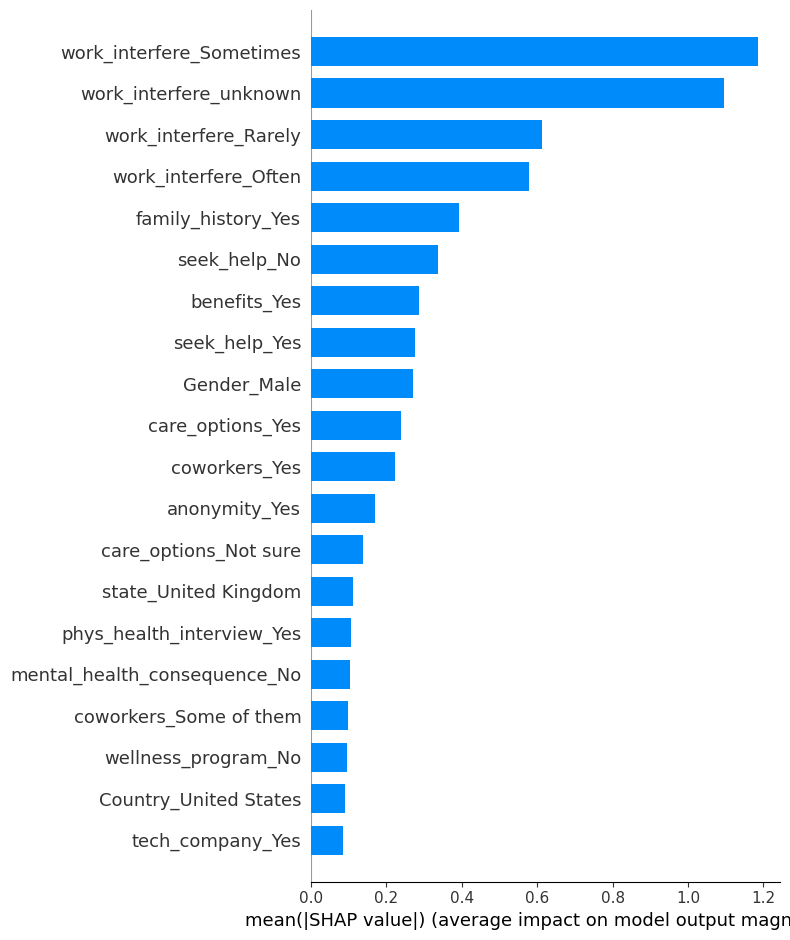

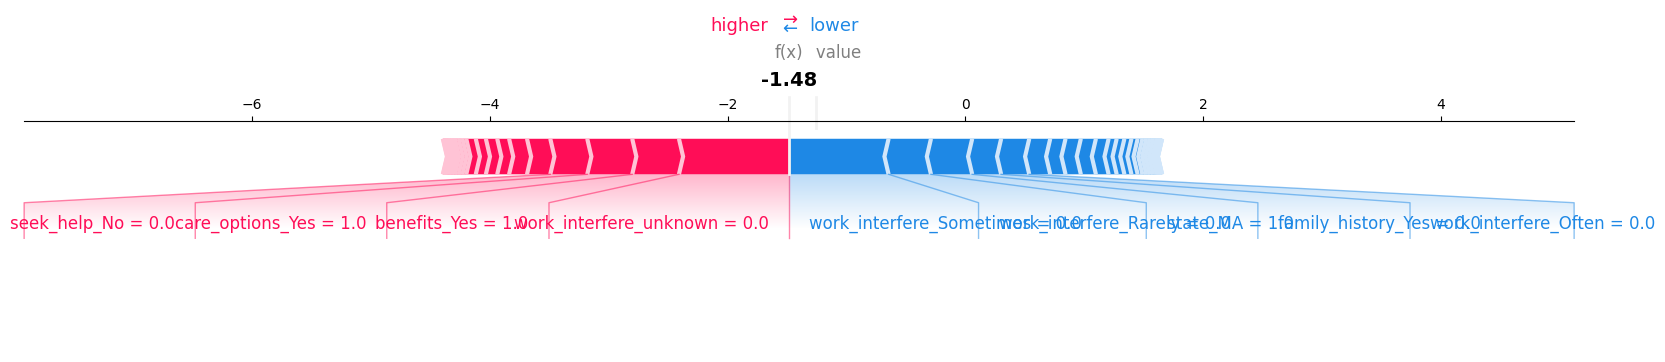

In [136]:
masker = shap.maskers.Independent(X_train)  # Use Independent masker for feature perturbation
explainer = shap.LinearExplainer(lrc, masker=masker)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Force plot for a single prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :], matplotlib=True)